In [1]:
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import datetime
import pickle
import seaborn as sns

In [2]:
df = pd.read_pickle('weather_ozone')

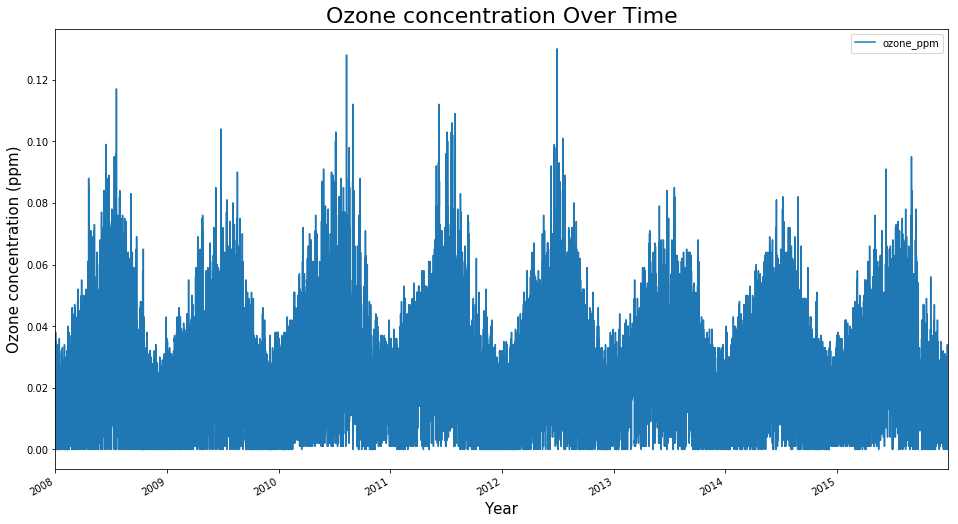

In [3]:
_ = plt.rcParams['figure.figsize'] = [16, 9]
_ = df.plot(y= 'ozone_ppm')
_ = plt.title("Ozone concentration Over Time", size=22)
_ = plt.xlabel("Year", size=15)
_ = plt.ylabel("Ozone concentration (ppm)", size=15)


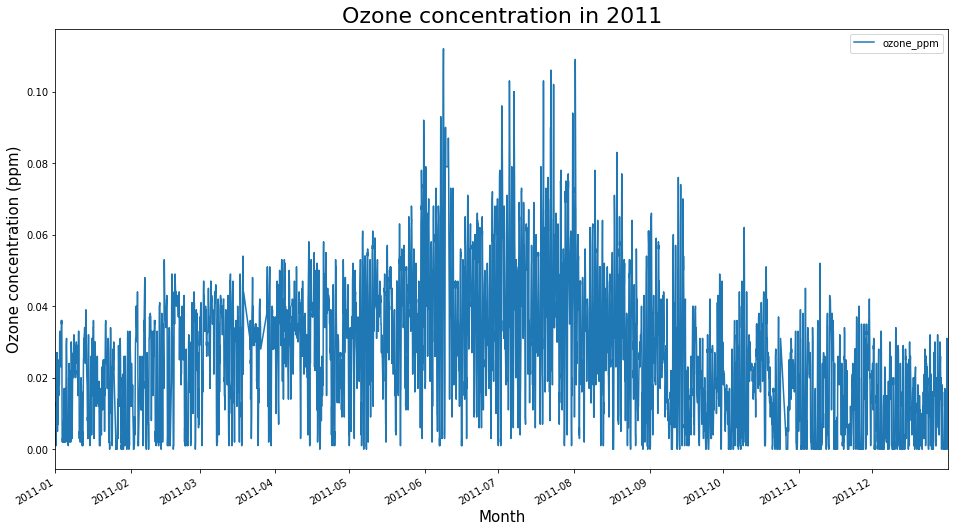

In [4]:
_ = plt.rcParams['figure.figsize'] = [16, 9]
_ = df['2011'].plot(y= 'ozone_ppm')
_ = plt.title("Ozone concentration in 2011", size=22)
_ = plt.xlabel("Month", size=15)
_ = plt.ylabel("Ozone concentration (ppm)", size=15)


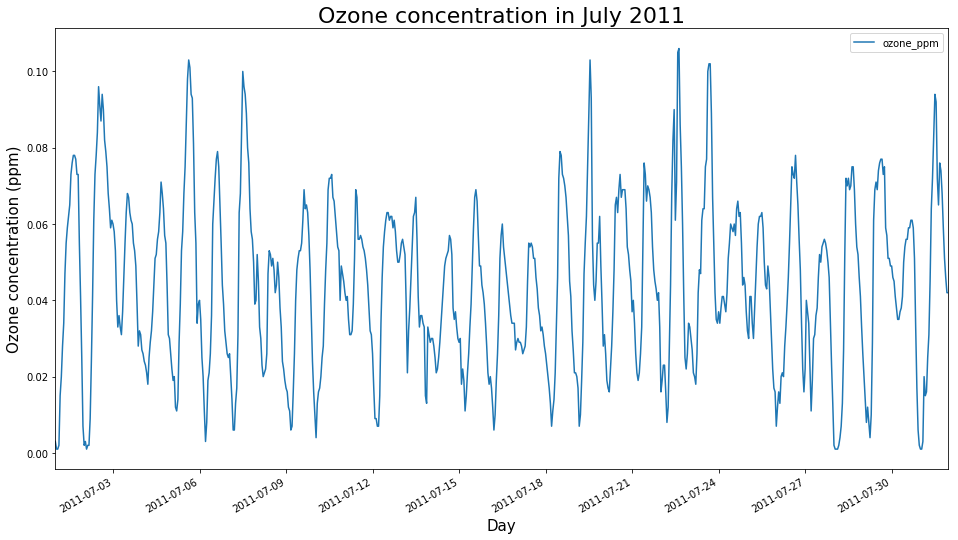

In [5]:
_ = plt.rcParams['figure.figsize'] = [16, 9]
_ = df['2011-07'].plot(y= 'ozone_ppm')
_ = plt.title("Ozone concentration in July 2011", size=22)
_ = plt.xlabel("Day", size=15)
_ = plt.ylabel("Ozone concentration (ppm)", size=15)


In [6]:
np.sqrt(len(df))

261.38286095304721

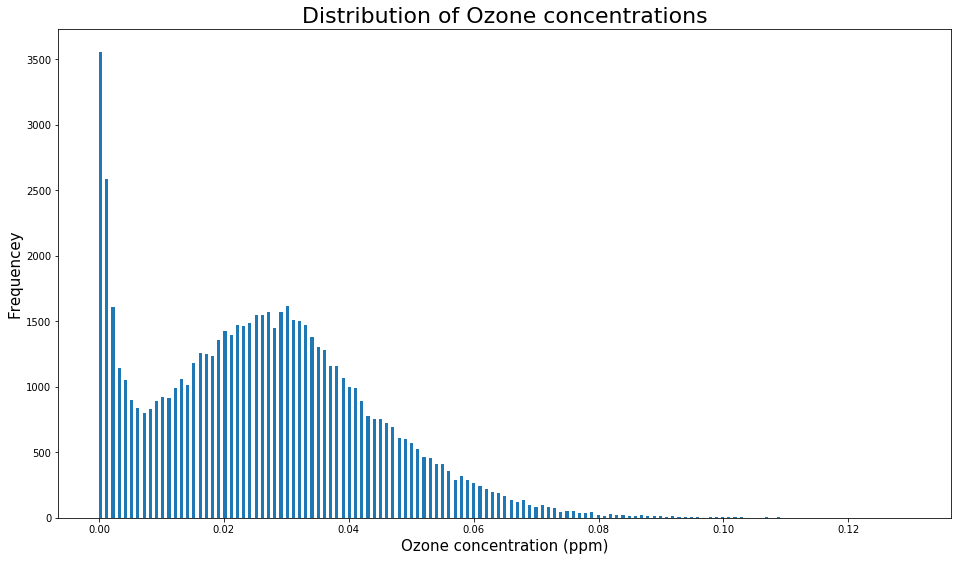

In [7]:
#df.plot(y='ozone_ppm', kind='hist', bins='freedman')
plt.hist(df.ozone_ppm, bins= 261)
plt.title("Distribution of Ozone concentrations", size=22)
plt.xlabel("Ozone concentration (ppm)", size=15)
plt.ylabel("Frequencey", size=15)
plt.show()

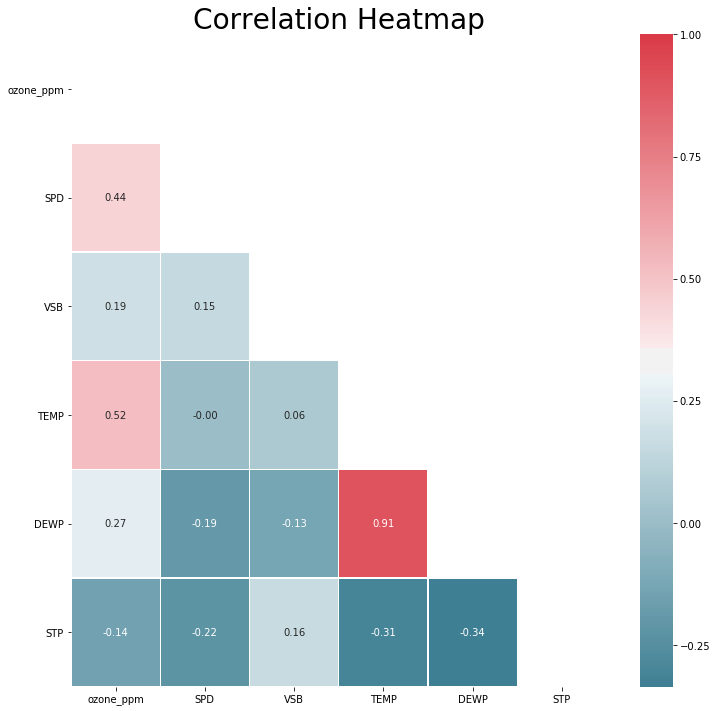

In [8]:
#Create Correlation df
corr_matrix = df.corr()
    #Plot figsize
fig, ax = plt.subplots(figsize=(12, 12))
    #Generate Color Map, red & blue
colormap = sns.diverging_palette(220, 10, as_cmap=True)
    #Mask for upper triangle
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
    #Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr_matrix, cmap=colormap, annot=True, fmt=".2f", mask=mask, linewidths=0.2) 
    #show plot
plt.title("Correlation Heatmap", size=28)
plt.yticks(rotation = 0)

plt.show()

In [9]:
years = sorted(df.index.year.unique())
months = sorted(df.index.month.unique())
month_names = ['January', 'February', 'March', 'April', 'May', 
               'June', 'July', 'August', 'September', 'October', 'November', 'December']
print years
print months

[2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


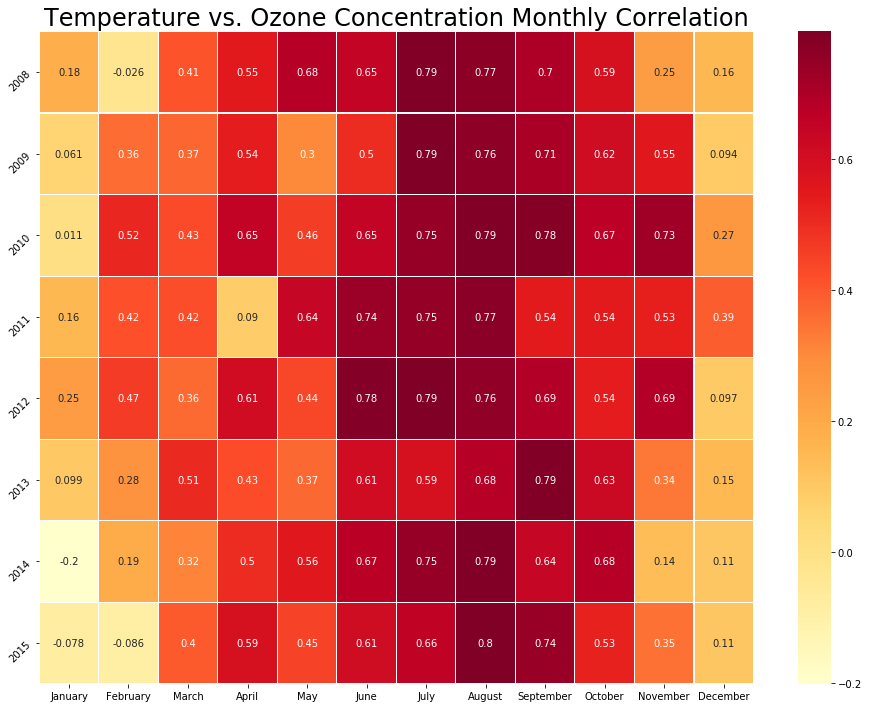

In [10]:
temp_corr = []
for yr in years:
    temp_corr.append([])
    for mo in months:
        temp_corr[-1].append(df[(df.index.year == yr) & 
                                (df.index.month == mo)][['ozone_ppm','TEMP']].corr().iloc[0,1])
temp_corr = np.array(temp_corr)
fig, ax = plt.subplots(figsize=(16, 12))
sns.heatmap(temp_corr, xticklabels = month_names, yticklabels = years, annot=True, linewidths=.2, cmap="YlOrRd")
plt.title("Temperature vs. Ozone Concentration Monthly Correlation", size=24)
plt.yticks(rotation=45)
plt.show()

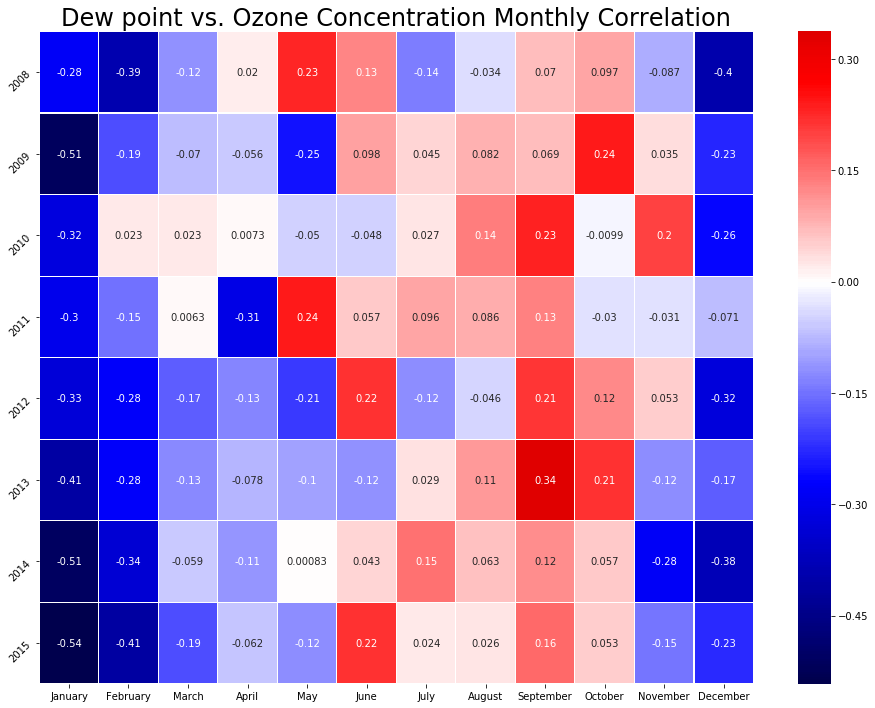

In [11]:
dewp_corr = []    
for yr in years:
    dewp_corr.append([])
    for mo in months:
        dewp_corr[-1].append(df[(df.index.year == yr) & 
                                (df.index.month == mo)][['ozone_ppm','DEWP']].corr().iloc[0,1])
dewp_corr = np.array(dewp_corr)
fig, ax = plt.subplots(figsize=(16, 12))
sns.heatmap(dewp_corr, xticklabels = month_names, yticklabels = years, 
            annot=True, linewidths=.2, cmap="seismic", center=0)
plt.title("Dew point vs. Ozone Concentration Monthly Correlation", size=24)
plt.yticks(rotation=45)
plt.show()

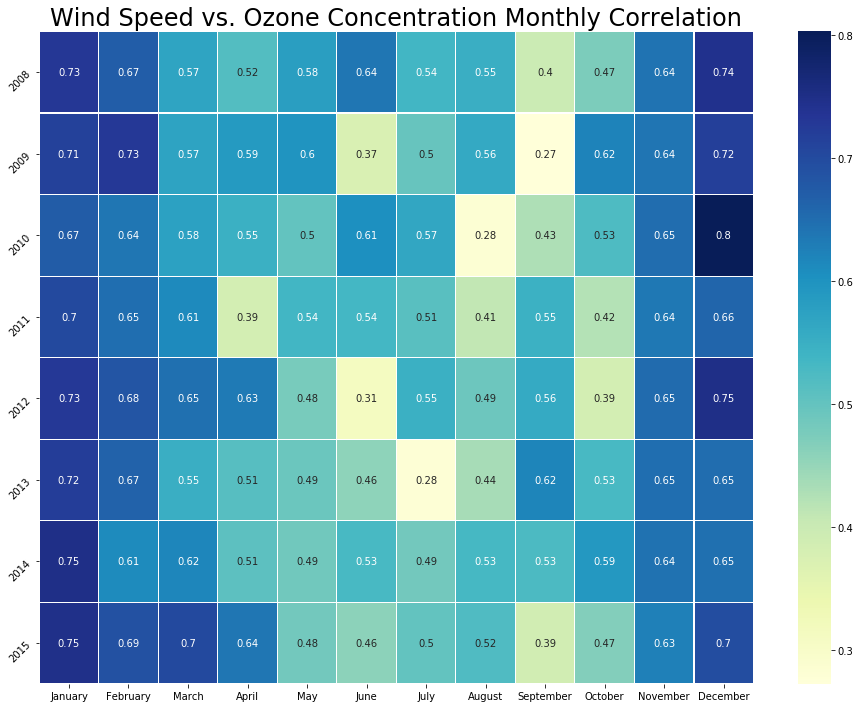

In [12]:
spd_corr = []    
for yr in years:
    spd_corr.append([])
    for mo in months:
        spd_corr[-1].append(df[(df.index.year == yr) & 
                                (df.index.month == mo)][['ozone_ppm','SPD']].corr().iloc[0,1])
spd_corr = np.array(spd_corr)
fig, ax = plt.subplots(figsize=(16, 12))
sns.heatmap(spd_corr, xticklabels = month_names, yticklabels = years, annot=True, linewidths=.2, cmap="YlGnBu")
plt.title("Wind Speed vs. Ozone Concentration Monthly Correlation", size=24)
plt.yticks(rotation=45)
plt.show()

In [13]:
temp_monthly = []
for mo in months:
        temp_monthly.append(df[(df.index.month == mo)][['ozone_ppm','TEMP']].corr().iloc[0,1])
temp_monthly = np.array(temp_monthly)

dewp_monthly = []
for mo in months:
        dewp_monthly.append(df[(df.index.month == mo)][['ozone_ppm','DEWP']].corr().iloc[0,1])
dewp_monthly = np.array(dewp_monthly)

spd_monthly = []
for mo in months:
        spd_monthly.append(df[(df.index.month == mo)][['ozone_ppm','SPD']].corr().iloc[0,1])
spd_monthly = np.array(spd_monthly)

vsb_monthly = []
for mo in months:
        vsb_monthly.append(df[(df.index.month == mo)][['ozone_ppm','VSB']].corr().iloc[0,1])
vsb_monthly = np.array(vsb_monthly)

stp_monthly = []
for mo in months:
        stp_monthly.append(df[(df.index.month == mo)][['ozone_ppm','STP']].corr().iloc[0,1])
stp_monthly = np.array(stp_monthly)



In [14]:
monthly_corr = pd.DataFrame(data = {'Temperature correlation':temp_monthly, 'Dew point correlation':dewp_monthly, 
                                    'Wind speed correlation':spd_monthly, 'Visibility correlation':vsb_monthly,
                                   'Air Pressure correlation':stp_monthly}, index = month_names)

In [15]:
monthly_corr

,Air Pressure correlation,Dew point correlation,Temperature correlation,Visibility correlation,Wind speed correlation
January,0.001867,-0.401602,0.010394,0.292329,0.719823
February,-0.082039,-0.282293,0.177663,0.230918,0.661666
March,-0.063923,-0.071715,0.359673,0.168812,0.609244
April,0.045401,-0.094007,0.484331,0.218165,0.536934
May,0.057570,-0.025937,0.491196,0.255179,0.516910
June,0.024297,0.057392,0.655528,0.092538,0.474600
July,-0.073491,0.025312,0.728180,0.104850,0.455062
August,-0.031886,0.078001,0.759622,0.063173,0.463539
September,-0.064839,0.149594,0.691300,0.141822,0.474459
October,-0.091292,0.106308,0.598441,0.196688,0.496761


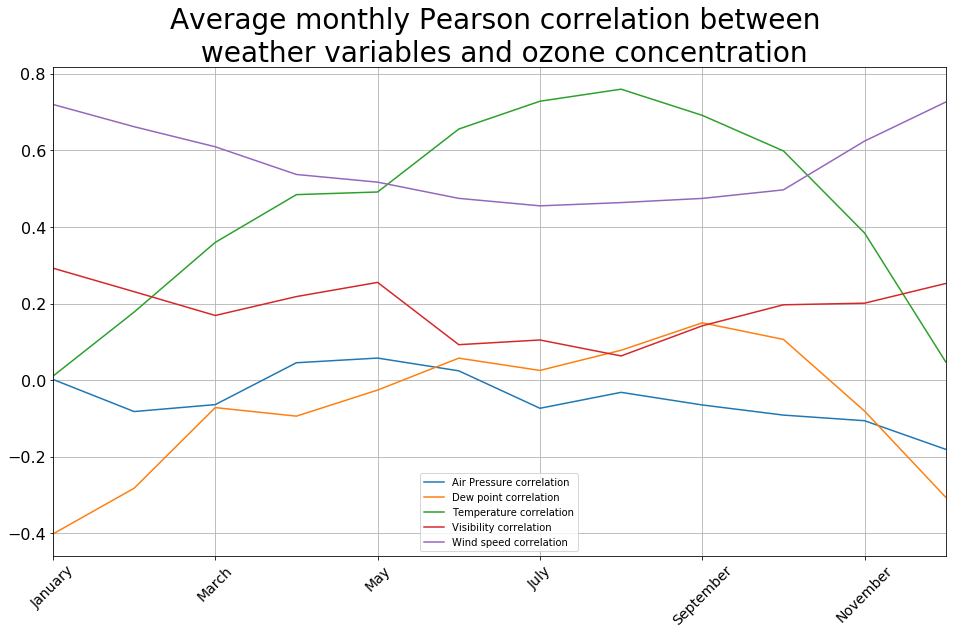

In [25]:
monthly_corr.plot()
plt.title("Average monthly Pearson correlation between \n weather variables and ozone concentration", size=28)
plt.xticks(rotation=45, size=14)
plt.yticks(size=16)
plt.grid()
plt.show()

In [17]:
monthly_corr.to_pickle('monthly_corr')

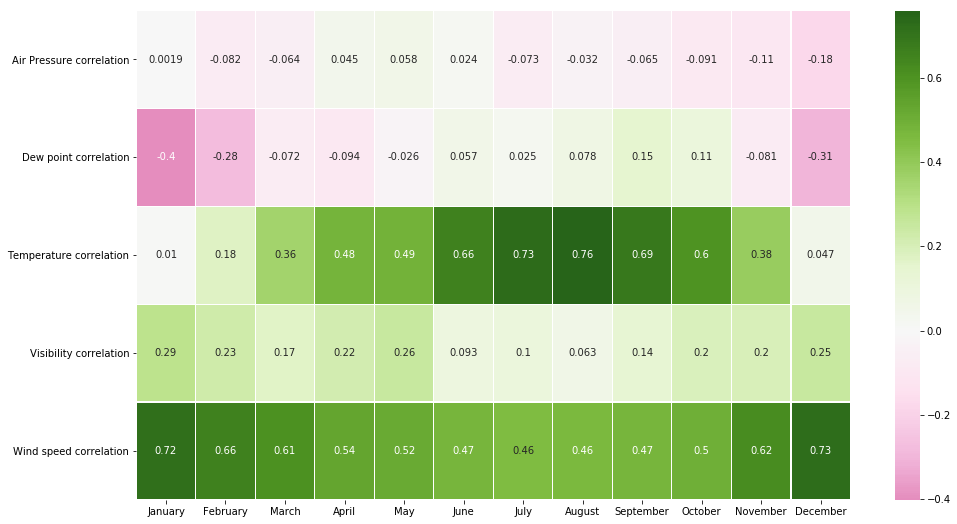

In [21]:
sns.heatmap(monthly_corr.transpose(), annot=True, linewidths=.2, cmap="PiYG", center=0)